In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = (session.query(measurement.date).order_by(measurement.date.desc()).first())
recent_date = list(np.ravel(recent_date))[0]
recent_date = dt.datetime.strptime(recent_date, '%Y-%m-%d')
recent_date

datetime.datetime(2017, 8, 23, 0, 0)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

previous_year = recent_date - dt.timedelta(days = 365)
previous_year    

datetime.datetime(2016, 8, 23, 0, 0)

In [11]:
# Perform a query to retrieve the data and precipitation scores

percip_data = (session.query(measurement.date, measurement.prcp)\
                     .filter(measurement.date > previous_year)\
                     .order_by(measurement.date).all())

# Save the query results as a Pandas DataFrame and set the index to the date column

percip_df = pd.DataFrame(data = percip_data, columns = ['date', 'percipitation'])
percip_df.set_index('date', inplace = True)

# Sort the dataframe by date
sorted_percip_df = percip_df.sort_values(by='date')
sorted_percip_df.head()

,percipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


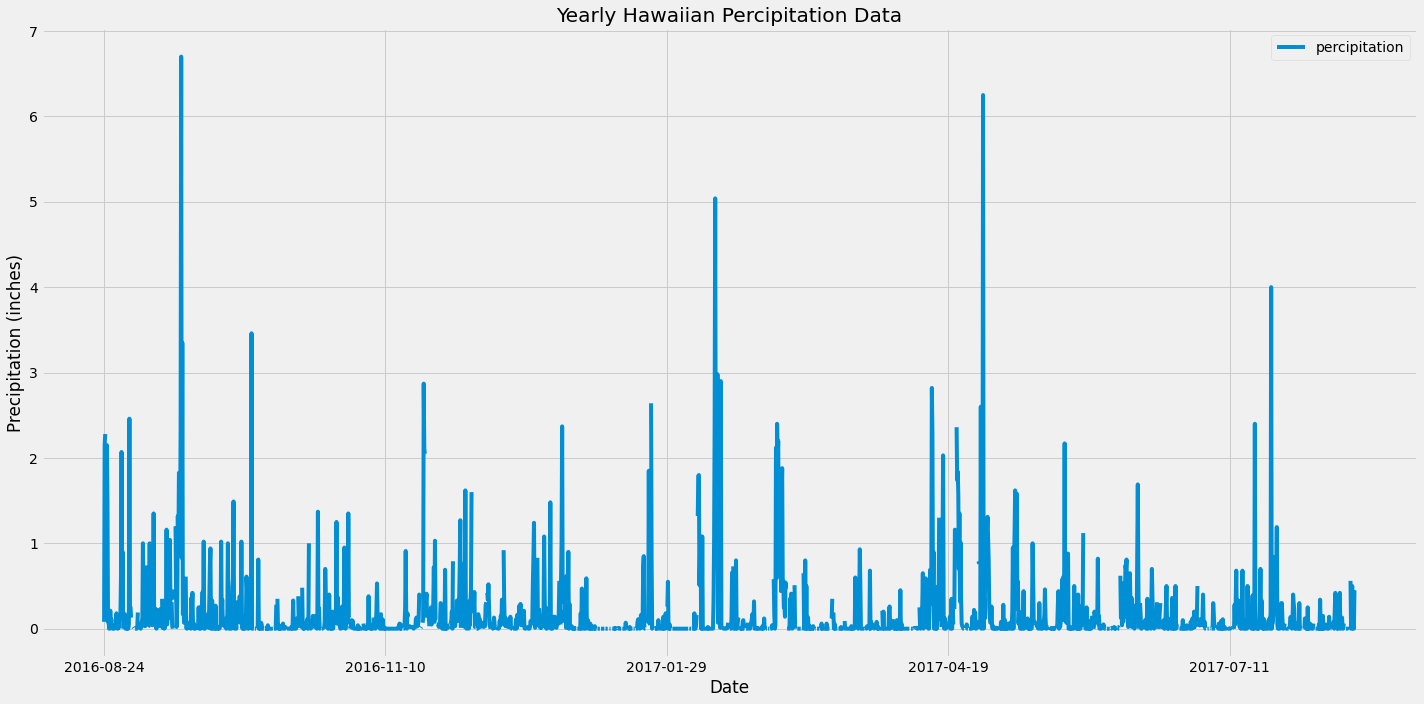

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20, 10))
sorted_percip_df.plot(ax = ax, x_compat = True)

#title and labels
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (inches)')
ax.set_title('Yearly Hawaiian Percipitation Data')

plt.savefig("Images/precipitation_graph.png")
#plot
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_percip_df.describe()

,percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
station_count = (session.query(station).count())

print(f'Station Count: {station_count}')

Station Count: 9


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_obs = (session.query(measurement.station, func.count(measurement.station))\
                      .group_by(measurement.station)\
                      .order_by(func.count(measurement.station).desc()).all())
station_obs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Most Active station
station_id = station_obs[0][0]
print(f'The most active station in this data set is {station_id}')


The most active station in this data set is USC00519281


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Highest Temp Observered
max_temp = (session.query(measurement.tobs)
                      .filter(measurement.station == station_id)
                      .order_by(measurement.tobs.desc())
                      .first())

highest_temp = max_temp[0]

print(f'The max temperature observed is {highest_temp}')

The max temperature observed is 85.0


In [18]:
# Lowest Temp Observed
min_temp = (session.query(measurement.tobs)
                     .filter(measurement.station == station_id)
                     .order_by(measurement.tobs.asc())
                     .first())

lowest_temp = min_temp[0]
print(f'The lowest temperature observed is {lowest_temp}')

The lowest temperature observed is 54.0


In [19]:
# Average Temp Observed
avg_temp = (session.query(func.avg(measurement.tobs))
                  .filter(measurement.station == station_id))

avg_temp = '{0:.3}'.format(avg_temp[0][0])

print(f'The average temperature observed is {avg_temp}')

The average temperature observed is 71.7


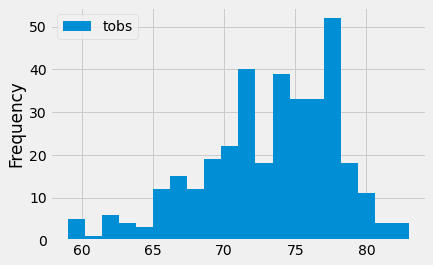

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = (session.query(measurement.date, measurement.tobs)\
                    .filter(measurement.date > previous_year)\
                    .filter(measurement.station == station_id )\
                    .order_by(measurement.date)\
                    .all())

#Create and Organize DataFrame
temp_df = pd.DataFrame(temp_data)
temp_df = temp_df.set_index('date')
temp_df = temp_df.sort_index(ascending=True)

#Create histogram
temp_df.plot(kind='hist', bins=20)   

plt.title = ('Temperature Frequency Distirbutions')    #Need to figure out why labels arent showing!!!!!!
plt.ylabel = ('Counts') 
plt.xlabel = ('Temperature')

#save image
plt.savefig('Images/Station_hist.png')


plt.show()

# Close session

In [21]:
# Close Session
session.close()